In [3]:
import os
import cv2
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
# Mengubah data menjadi Array
img_size_224p = 224
path_train  = 'C:\\Users\\ASUS\Documents\\Python Folder\\Python Tutor\\ProjectAkhirMultimedia\\train'
path_inet   = 'C:\\Users\\ASUS\\Documents\\Python Folder\\Python Tutor\\ProjectAkhirMultimedia\\inet'
path_test   = 'C:\\Users\\ASUS\\Documents\\Python Folder\\Python Tutor\\ProjectAkhirMultimedia\\test'
categories  = ['jahe_emprit', 'jahe_merah', 'jahe_putih', 'kencur', 'kunyit_hitam','kunyit_kuning','kunyit_putih','lengkuas','temulawak']

def create_data_img(folder_path):
    imageData = []
    for category in categories:
        path = os.path.join(folder_path, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array   = cv2.imread(os.path.join(path, img))
            img_convert = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_resize  = cv2.resize(img_convert, (img_size_224p, img_size_224p))
            imageData.append([img_resize, class_num])

    return imageData

dataTrain   = create_data_img(path_train)
dataTest    = create_data_img(path_test)
dataInet    = create_data_img(path_inet)
random.seed(10)
random.shuffle(dataTrain)

In [5]:
# X untuk Features & y untuk labels
X_train, y_train, X_test, y_test, X_inet, y_inet = [], [], [], [], [], []

for features, label in dataTrain:
    X_train.append(features)
    y_train.append(label)

for features, label in dataTest:
    X_test.append(features)
    y_test.append(label)

for features, label in dataInet:
    X_inet.append(features)
    y_inet.append(label)

# -1 di reshape artinya membiarkan numpy menentukan dimensi data yang sesuai
X_train = np.array(X_train).reshape(-1, img_size_224p, img_size_224p, 3)
y_train = np.asarray(y_train)
X_test  = np.array(X_test).reshape(-1, img_size_224p, img_size_224p, 3)
y_test  = np.asarray(y_test)
X_inet  = np.array(X_inet).reshape(-1, img_size_224p, img_size_224p, 3)
y_inet  = np.asarray(y_inet)

print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test  :", X_test.shape)
print("y_test  :", y_test.shape)
print("X_inet  :", X_inet.shape)
print("y_inet  :", y_inet.shape)

X_train : (3231, 224, 224, 3)
y_train : (3231,)
X_test  : (1782, 224, 224, 3)
y_test  : (1782,)
X_inet  : (189, 224, 224, 3)
y_inet  : (189,)


In [6]:
print("Isi Array X_train :\n\n", X_train[0]) # Ambil contoh data pertama
print("\nIsi Array X_test  :\n\n", X_test[0])
print("\nIsi Array X_inet  :\n\n", X_inet[0])

def prep_pixels(train, test, inet):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    inet_norm = inet.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    inet_norm = inet_norm / 255.0
    # return normalized images
    return train_norm, test_norm, inet_norm

X_train_norm, X_test_norm, X_inet_norm = prep_pixels(X_train, X_test, X_inet)

print("\nIsi Array X_train_norm :\n\n", X_train_norm[0])
print("\nIsi Array X_test_norm  :\n\n", X_test_norm[0])
print("\nIsi Array X_inet_norm  :\n\n", X_inet_norm[0])

Isi Array X_train :

 [[[121 115 117]
  [124 120 119]
  [126 120 120]
  ...
  [138 128 126]
  [138 128 126]
  [143 133 131]]

 [[125 119 119]
  [124 118 118]
  [124 118 118]
  ...
  [138 133 129]
  [141 131 129]
  [138 128 126]]

 [[123 117 117]
  [124 118 118]
  [129 123 123]
  ...
  [137 132 129]
  [139 129 127]
  [140 130 129]]

 ...

 [[133 128 125]
  [134 129 126]
  [134 129 126]
  ...
  [162 157 154]
  [163 158 155]
  [168 158 157]]

 [[135 125 124]
  [144 134 133]
  [134 129 126]
  ...
  [160 155 152]
  [165 155 154]
  [166 156 155]]

 [[131 121 119]
  [134 124 122]
  [137 127 125]
  ...
  [164 159 156]
  [163 153 152]
  [163 153 152]]]

Isi Array X_test  :

 [[[156 153 160]
  [158 155 162]
  [158 157 162]
  ...
  [121 115 115]
  [121 114 114]
  [120 114 114]]

 [[155 153 158]
  [154 153 158]
  [155 154 159]
  ...
  [122 118 117]
  [125 116 117]
  [124 118 118]]

 [[158 156 161]
  [157 156 161]
  [160 159 164]
  ...
  [121 115 115]
  [120 111 112]
  [123 114 115]]

 ...

 [[158 

In [7]:
from keras.utils import to_categorical

print("Isi Array y_train :", y_train)
print("Isi Array y_test  :", y_test)
print("Isi Array y_inet  :", y_inet)

# one hot encode target values
y_train_encode = to_categorical(y_train)
y_test_encode  = to_categorical(y_test)
y_inet_encode  = to_categorical(y_inet)

print("\nIsi Array y_train_encode :\n\n", y_train_encode)
print("\nIsi Array y_test_encode :\n\n", y_test_encode)
print("\nIsi Array y_inet_encode :\n\n", y_inet_encode)

Isi Array y_train : [1 5 3 ... 4 0 6]
Isi Array y_test  : [0 0 0 ... 8 8 8]
Isi Array y_inet  : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8]

Isi Array y_train_encode :

 [[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]

Isi Array y_test_encode :

 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]

Isi Array y_inet_encode :

 [[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ...

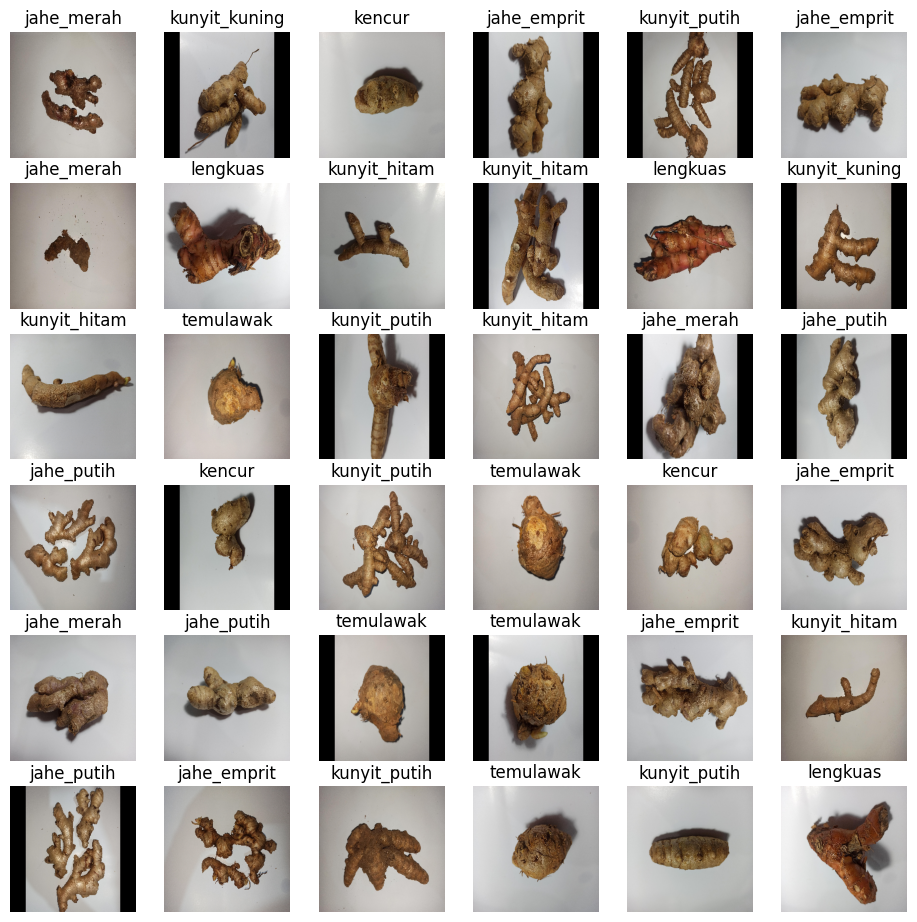

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

nrows = 6
ncols = 6
hspace = 0
wspace = 0
fig, ax = plt.subplots(nrows, ncols, figsize=(10, 10))
fig.subplots_adjust(hspace, wspace)

for i in range(nrows):
    for j in range(ncols):
        temp = i*ncols+j
        ax[i,j].imshow(X_train[temp])
        if y_train[temp] == 0:
            judul = "jahe_emprit"
        elif y_train[temp] == 1:
            judul = "jahe_merah"
        elif y_train[temp] == 2:
            judul = "jahe_putih"
        elif y_train[temp] == 3:
            judul = "kencur"
        elif y_train[temp] == 4:
            judul = "kunyit_hitam"
        elif y_train[temp] == 5:
            judul = "kunyit_kuning"
        elif y_train[temp] == 6:
            judul = "kunyit_putih"
        elif y_train[temp] == 7:
            judul = "lengkuas"
        elif y_train[temp] == 8:
            judul = "temulawak"
        ax[i,j].set_title(judul)
        ax[i,j].axis('off')
plt.show()

In [9]:
import gc
del dataTrain
del dataTest
del dataInet
del X_train
del X_test
del X_inet

In [10]:
#data yang digunakan
print("X_train_norm     :", X_train_norm.shape)
print("y_train_encode   :", y_train_encode.shape)
print("X_test_norm      :", X_test_norm.shape)
print("y_test_encode    :", y_test_encode.shape)
print("X_inet_norm      :", X_inet_norm.shape)
print("y_inet_encode    :", y_inet_encode.shape)

X_train_norm     : (3231, 224, 224, 3)
y_train_encode   : (3231, 9)
X_test_norm      : (1782, 224, 224, 3)
y_test_encode    : (1782, 9)
X_inet_norm      : (189, 224, 224, 3)
y_inet_encode    : (189, 9)


In [11]:
from keras.applications import MobileNetV2
from keras.utils import plot_model

conv_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size_224p, img_size_224p, 3))
conv_base.trainable = False
conv_base.summary()




Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from keras.optimizers import Adam

def define_model_mobilenetv2():
    model = Sequential()
    model.add(conv_base)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(9, activation='softmax'))
    opt = Adam(lr=0.0003)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

if "model" in globals():
  del model
  gc.collect()

model = define_model_mobilenetv2()
model.summary()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 9)                 11529     
                                                                 
Total params: 2269513 (8.66 MB)
Trainable params: 11529 (45.04 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work

In [13]:
import pandas as pd

epochs = 10
batch_size = 64

model = define_model_mobilenetv2()
history = model.fit(X_train_norm, y_train_encode, epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/10



51/51 [==============================] - 35s 605ms/step - loss: 1.2360 - accuracy: 0.6085
Epoch 2/10
51/51 [==============================] - 33s 649ms/step - loss: 0.5284 - accuracy: 0.8582
Epoch 3/10
51/51 [==============================] - 35s 689ms/step - loss: 0.3774 - accuracy: 0.9034
Epoch 4/10
51/51 [==============================] - 38s 745ms/step - loss: 0.3022 - accuracy: 0.9229
Epoch 5/10
51/51 [==============================] - 38s 738ms/step - loss: 0.2505 - accuracy: 0.9378
Epoch 6/10
51/51 [==============================] - 34s 665ms/step - loss: 0.2193 - accuracy: 0.9477
Epoch 7/10
51/51 [==============================] - 34s 665ms/step - loss: 0.1881 - accuracy: 0.9604
Epoch 8/10
51/51 [==============================] - 33s 648ms/step - loss: 0.1641 - accuracy: 0.9669
Epoch 9/10
51/51 [==============================] - 36s 699ms/step - loss: 0.1471 - accuracy: 0.9709
Epoch 10/10
51/51 [==============================] - 33s 653ms/step - loss: 0.1337 - accuracy: 0.9731


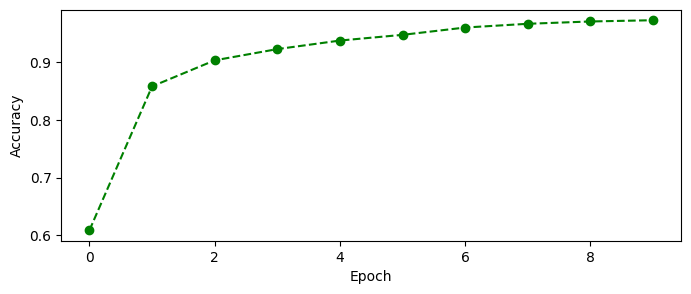

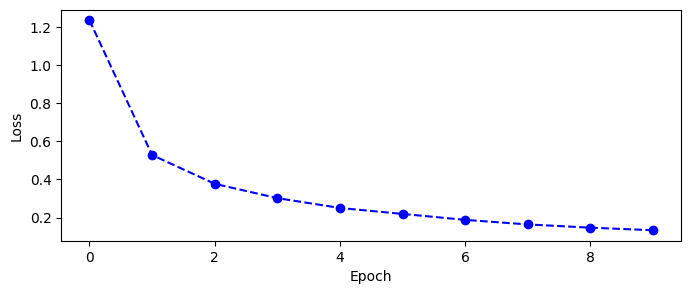

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['accuracy'], 'og', linestyle='dashed')
#ax.plot(history.history['val_accuracy'])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
#ax.legend(['train', 'val'], loc='lower right')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.plot(history.history['loss'], 'ob', linestyle='dashed')
#ax.plot(history.history['val_loss'])
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
#ax.legend(['train', 'val'], loc='upper right')
plt.show()

In [15]:
model.save("C:\\Users\\ASUS\\Documents\\Python Folder\\Python Tutor\\ProjectAkhirMultimedia\\mobileNet_v2.h5")

# 02 - Save model report to csv
model_csv = pd.DataFrame(history.history)
csv_file = "C:\\Users\ASUS\\Documents\\Python Folder\\Python Tutor\\ProjectAkhirMultimedia\\mobileNet_v2.csv"
with open(csv_file, mode="w") as f:
  model_csv.to_csv(f)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
if "model" in globals():
  del model
  gc.collect()

In [17]:
from keras.models import load_model

model = load_model('C:\\Users\\ASUS\\Documents\\Python Folder\\Python Tutor\\ProjectAkhirMultimedia\\mobileNet_v2.h5')

In [18]:
from sklearn.preprocessing import LabelBinarizer

if "encoder" in globals():
    del encoder
    del y_train_encode_new
    del y_test_encode_new
    del y_inet_encode_new
    del pred
    del prediksi
    del true_label
    gc.collect()

encoder = LabelBinarizer()
y_train_encode_new = encoder.fit_transform(y_train)
y_test_encode_new = encoder.fit_transform(y_test)
y_inet_encode_new = encoder.fit_transform(y_inet)

pred = model.predict(X_test_norm.astype('float32'), verbose=0)
prediksi = np.argmax(pred, axis=-1)

pred_label = np.argmax(pred, axis=-1)
true_label = np.argmax(y_test_encode_new, axis=-1)

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_test_norm, y_test_encode_new, verbose=1)


Label Prediksi   : [5 5 2 ... 8 8 8]
Label Sebenarya  : [0 0 0 ... 8 8 8] 

56/56 [==============================] - 21s 342ms/step - loss: 0.3681 - accuracy: 0.8721


In [19]:
from sklearn.preprocessing import LabelBinarizer

if "encoder" in globals():
    del encoder
    del y_train_encode_new
    del y_test_encode_new
    del y_inet_encode_new
    del pred
    del prediksi
    del pred_label
    del true_label
    gc.collect()

# Encoding Labels (y) dengan cara yang berbeda, untuk keperluan confusion matrix
encoder = LabelBinarizer()
y_train_encode_new = encoder.fit_transform(y_train)
y_test_encode_new = encoder.fit_transform(y_test)
y_inet_encode_new = encoder.fit_transform(y_inet)


pred = model.predict(X_inet_norm.astype('float32'), verbose=0)
prediksi = np.argmax(pred, axis=-1)

pred_label = np.argmax(pred, axis=-1)
true_label = np.argmax(y_inet_encode_new, axis=-1)

print("Label Prediksi   :", pred_label)
print("Label Sebenarya  :", true_label, "\n")
loss, acc = model.evaluate(X_inet_norm, y_inet_encode_new, verbose=1)

Label Prediksi   : [2 2 2 0 7 0 0 2 2 2 0 0 0 0 2 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 5 3 3 3 3 3 3 2 3 3 3
 3 3 3 2 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 5 6 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 3 8 8 8 8 8 8 3 8 8 8 8 8 8 3 8 8
 8 8 8 8]
Label Sebenarya  : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8] 

6/6 [==============================] - 2s 349ms/step - loss: 0.2808 - accuracy: 0.8942


Accuracy : 89.418%
Loss     : 0.281

Classification Report :

               precision    recall  f1-score   support

  jahe_emprit       0.86      0.57      0.69        21
   jahe_merah       0.90      0.90      0.90        21
   jahe_putih       0.69      0.95      0.80        21
       kencur       0.86      0.86      0.86        21
 kunyit_hitam       1.00      1.00      1.00        21
kunyit_kuning       0.88      1.00      0.93        21
 kunyit_putih       1.00      0.90      0.95        21
     lengkuas       0.95      1.00      0.98        21
    temulawak       1.00      0.86      0.92        21

     accuracy                           0.89       189
    macro avg       0.90      0.89      0.89       189
 weighted avg       0.90      0.89      0.89       189



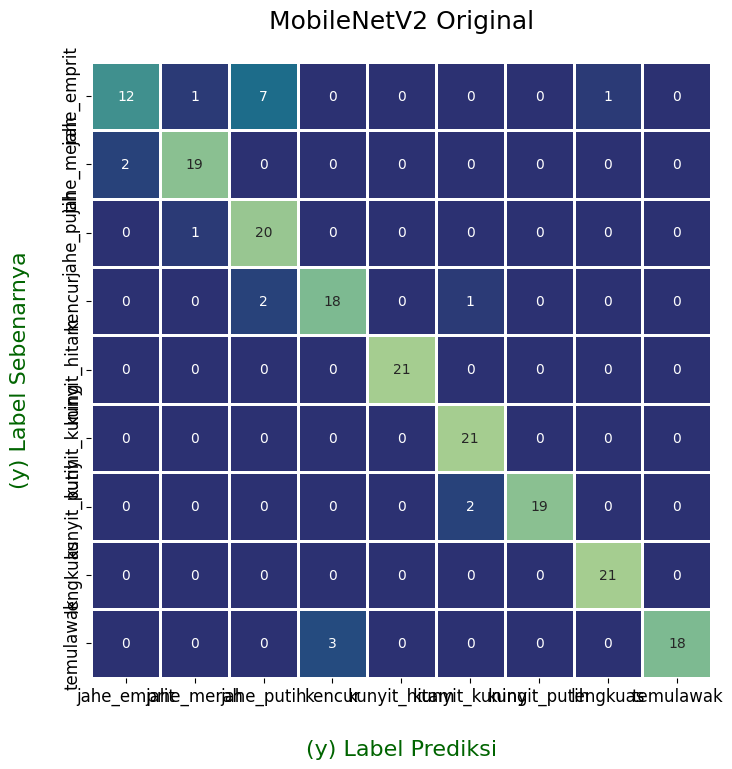

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

target_names = ['jahe_emprit', 'jahe_merah', 'jahe_putih', 'kencur', 'kunyit_hitam','kunyit_kuning','kunyit_putih','lengkuas','temulawak']
cmatrix = confusion_matrix(true_label, pred_label)
creport = classification_report(true_label, prediksi, target_names=target_names)

print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
print(creport)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cmatrix, cmap="crest_r", annot=True, fmt='.4g', linewidths=2, linecolor='white', cbar=False, ax=ax)

ax.set_title('MobileNetV2 Original', fontsize=18, pad=24)
ax.set_xticklabels(labels=target_names, fontsize=12)
ax.set_yticklabels(labels=target_names, fontsize=12)

plt.xlabel("(y) Label Prediksi", fontsize=16, color="darkgreen", labelpad=24)
plt.ylabel("(y) Label Sebenarnya", fontsize=16, color="darkgreen", labelpad=24)
plt.show()

In [23]:
# Ini buat handle inputan citra baru

from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import load_model

# load and prepare the image
def load_image(filename):
    img = load_img(filename, target_size=(img_size_224p, img_size_224p))
    plt.imshow(img)
    plt.axis("off");
    img = img_to_array(img)
    img = img.reshape(-1, img_size_224p, img_size_224p, 3)
    img = img.astype('float32')
    img = img / 255.0
    return img

def run_example(new_data_path):
    # load the image
    img = load_image(new_data_path)
    # load model
    model = load_model('C://Users//ASUS//Documents//Python Folder//Python Tutor//ProjectAkhirMultimedia//mobileNet_v2.h5')
    # predict the class probabilities
    result_probs = model.predict(img)
    # get the predicted class index
    result_index = np.argmax(result_probs)

    # map the index to class names
    class_names = ['jahe_emprit', 'jahe_merah', 'jahe_putih', 'kencur', 'kunyit_hitam', 'kunyit_kuning', 'kunyit_putih', 'lengkuas', 'temulawak']
    predicted_class = class_names[result_index]

    print(f"\nHasil Prediksi: {predicted_class}")

1/1 [==============================] - 1s 880ms/step

Hasil Prediksi: jahe_merah


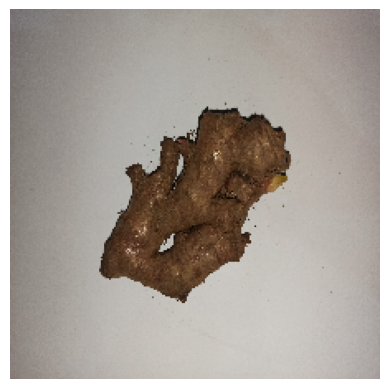

In [24]:
new_data_path = 'C://Users//ASUS//Documents//Python Folder//Python Tutor//ProjectAkhirMultimedia//JM08.jpg'
run_example(new_data_path)